In [80]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import ast
import itertools
import networkx as nx
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import spacy
from text_preprocessing import to_lower, remove_email
import emoji
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jizenan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jizenan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/Users/jizenan/anaconda3/lib/python3.11/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/jizenan/anaconda3/lib/python3.11/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/jizenan/anaconda3/lib/python3.11/site-packages/seaborn/cm.py:1582: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.regi

In [2]:
sainsburys_df = pd.read_json('sainsburys.json')

In [3]:
sainsburys_df

created_at                   id               id_str  \
0     2020-12-02 21:25:42  1334247396054798336  1334247396054798336   
1     2020-03-25 08:55:11  1242736777103839237  1242736777103839237   
2     2020-03-15 18:07:30  1239251894293409797  1239251894293409797   
3     2020-10-18 10:43:27  1317778311729369088  1317778311729369088   
4     2020-11-07 20:52:20  1325179302384717824  1325179302384717824   
...                   ...                  ...                  ...   
82816 2020-03-24 09:20:16  1242380703783890944  1242380703783890944   
82817 2020-12-22 10:01:18  1341322914709319680  1341322914709319680   
82818 2020-10-03 09:40:22  1312326620368302080  1312326620368302080   
82819 2020-10-03 11:46:20  1312358321232449536  1312358321232449536   
82820 2020-04-17 14:51:25  1251161347670196228  1251161347670196228   

                                                    text display_text_range  \
0      RT @felixprojectuk: Today we collected some fo...               None   
1      @ocado @tesco @sainsburys @asda @waitrose @Mor...               None   
2      RT @Danwhite1972: Dear panic buyers\n\nPlease ...               None   
3      @daisy_haggard @sainsburys Can’t wait to see w...           [27, 79]   
4      @lordrix @sainsburys But Sainsbury's have made...          [21, 140]   
...                                                  ...                ...   
82816  @sainsburys I'm 74 but you say I'm not elderly...           [0, 112]   
82817  @Sposcer @sainsburys If the borders are not op...          [21, 117]   
82818  @nezbrun @Shergs888 @sainsburys @Argos_Online ...           [46, 96]   
82819  @SkyNews @SkySportsPL @BBCNews @GMB @Channel4N...           [0, 116]   
82820  RT @sainsburys: Help stop the spread while sho...               None   

                                                  source  truncated  \
0      <a href="http://twitter.com/download/iphone" r...      False   
1      <a href="http://twitter.com/download/iphone" r...       True   
2      <a href="http://twitter.com/#!/download/ipad" ...      False   
3      <a href="http://twitter.com/download/iphone" r...      False   
4      <a href="http://twitter.com/download/android" ...       True   
...                                                  ...        ...   
82816  <a href="https://mobile.twitter.com" rel="nofo...      False   
82817  <a href="http://twitter.com/download/iphone" r...      False   
82818  <a href="https://mobile.twitter.com" rel="nofo...      False   
82819  <a href="https://mobile.twitter.com" rel="nofo...      False   
82820  <a href="http://twitter.com/#!/download/ipad" ...      False   

       in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                        NaN                        NaN                  NaN   
1                        NaN                        NaN         2.015550e+07   
2                        NaN                        NaN                  NaN   
3               1.317512e+18               1.317512e+18         2.875019e+09   
4               1.325169e+18               1.325169e+18         5.496380e+07   
...                      ...                        ...                  ...   
82816                    NaN                        NaN         8.068565e+07   
82817           1.341323e+18               1.341323e+18         1.049639e+18   
82818           1.312323e+18               1.312323e+18         3.098093e+07   
82819                    NaN                        NaN         7.587032e+06   
82820                    NaN                        NaN                  NaN   

       ...   matching_rules  \
0      ...  [{'tag': None}]   
1      ...  [{'tag': None}]   
2      ...  [{'tag': None}]   
3      ...  [{'tag': None}]   
4      ...  [{'tag': None}]   
...    ...              ...   
82816  ...  [{'tag': None}]   
82817  ...  [{'tag': None}]   
82818  ...  [{'tag': None}]   
82819  ...  [{'tag': None}]   
82820  ...  [{'tag': None}]   

                          

In [4]:
print ('The length of the dataset is %s'%len(sainsburys_df))
print ('The begining date of the dataset is %s'%(str(min(sainsburys_df['created_at']))))
print ('The ending date of the dataset is %s'%(str(max(sainsburys_df['created_at']))))
print ("There are %s columns in this dataset"%(len(sainsburys_df.columns.values)))
sainsburys_df.columns.values

The length of the dataset is 82821
The begining date of the dataset is 2020-01-01 00:56:48
The ending date of the dataset is 2020-12-30 23:53:21
There are 37 columns in this dataset


array(['created_at', 'id', 'id_str', 'text', 'display_text_range',
       'source', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user',
       'geo', 'coordinates', 'place', 'contributors', 'is_quote_status',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'entities', 'favorited', 'retweeted', 'filter_level', 'lang',
       'matching_rules', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
       'extended_tweet', 'possibly_sensitive', 'extended_entities',
       'scopes'], dtype=object)

# Trend

In [5]:
sainsburys_df['date'] = sainsburys_df['created_at'].dt.date
sainsburys_df['date'] = pd.to_datetime(sainsburys_df['date'])

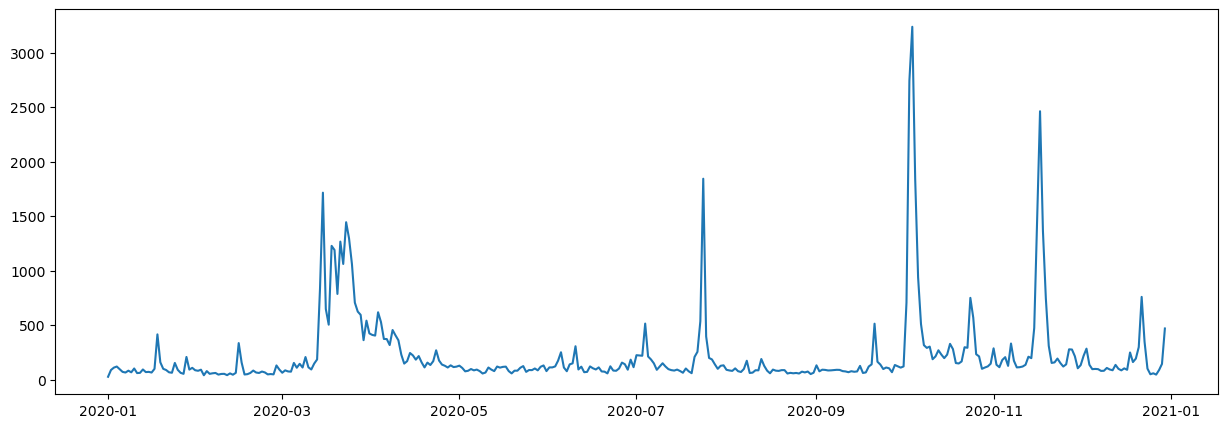

In [6]:
plt.figure(figsize=[15,5])
plt.plot(sainsburys_df.groupby(by=['date'])['id'].count())

In [7]:
sainsburys_df[['quote_count', 'reply_count', 'retweet_count', 'favorite_count']].describe()

quote_count   reply_count  retweet_count  favorite_count
count  82821.000000  82821.000000   82821.000000    82821.000000
mean       0.045230      0.471100       0.322442        2.615339
std        1.913578      7.626277      17.028065      130.707210
min        0.000000      0.000000       0.000000        0.000000
25%        0.000000      0.000000       0.000000        0.000000
50%        0.000000      0.000000       0.000000        0.000000
75%        0.000000      1.000000       0.000000        1.000000
max      334.000000   1655.000000    3274.000000    31420.000000

# most active users

In [8]:
sainsburys_df['user'].values[0]

"{'id': 1114765682, 'id_str': '1114765682', 'name': 'Marcus Roberts', 'screen_name': 'marcusrobertsuk', 'location': 'England, the home of football ', 'url': 'https://thefelixproject.org', 'description': 'Relationship Manager @felixprojectuk 💚Focus on the good, there really is so much of it. 👍🏽🌍✨', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 12510, 'friends_count': 895, 'listed_count': 164, 'favourites_count': 50116, 'statuses_count': 52862, 'created_at': 'Wed Jan 23 16:33:47 +0000 2013', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme14/bg.gif', 'profile_background_tile': False, 'profile_link_color': '1B95E0', 'profile_sidebar_border_color': '000000', 'profile_sideb

In [9]:
def extract_screen_name(user_info_str):
    try:
        user_info_dict = ast.literal_eval(user_info_str)
        return user_info_dict['screen_name']
    except (ValueError, SyntaxError):
        return None

sainsburys_df['user_screen_name'] = sainsburys_df['user'].apply(extract_screen_name)

In [10]:
active_user_df = sainsburys_df.groupby(by=['user_screen_name'])['id'].count().sort_values(ascending=False).reset_index().head(5)
active_user_df

user_screen_name   id
0      ExposeLies2  100
1     TakeCareTeam   65
2      socketman69   52
3      VanillaismD   47
4     claudiandfin   44

# What these users do?

In [11]:
def extract_user_profile(user_info_str):
    try:
        user_info_dict = ast.literal_eval(user_info_str)
        return user_info_dict['description']
    except (ValueError, SyntaxError):
        return None

sainsburys_df['user_profile'] = sainsburys_df['user'].apply(extract_user_profile)

In [12]:
pd.merge(sainsburys_df[['user_screen_name','user_profile']].drop_duplicates(),active_user_df)

user_screen_name                                       user_profile   id
0     TakeCareTeam                                   *PARODY ACCOUNT*   65
1      socketman69  Wife&2 kids Schnauzer calld Skye fundraiser Mu...   52
2      ExposeLies2  Saturated Fat #FILTHYPALMOIL from Bastard Non ...  100
3      socketman69  Family No 1 wife and 2 lids, Muscular Dystroph...   52
4      VanillaismD  Water conservation |\nSustainability agro-ecol...   47
5     claudiandfin  Lolly Lovers and Makers of Delicious Greek Sty...   44
6      VanillaismD  Organic Vanilla pod farmers |\nSocial entrepre...   47

# The geographical distribution of users

In [13]:
def extract_user_geo(user_info_str):
    try:
        user_info_dict = ast.literal_eval(user_info_str)
        return user_info_dict['location']
    except (ValueError, SyntaxError):
        return None

sainsburys_df['user_geo'] = sainsburys_df['user'].apply(extract_user_geo)

In [14]:
#user_geo_df = sainsburys_df['user_geo'].dropna()

In [15]:
sainsburys_df.groupby(by=['user_geo'])['id'].count().sort_values(ascending=False).head(20)

user_geo
London, England             3159
London                      2940
United Kingdom              2106
England, United Kingdom     1896
UK                          1830
England                      682
Manchester, England          478
South East, England          477
London, UK                   413
North West, England          359
Scotland                     349
Scotland, United Kingdom     346
Manchester                   318
Edinburgh, Scotland          293
South West, England          267
Birmingham, England          246
Glasgow, Scotland            238
Wales, United Kingdom        225
West Midlands, England       221
london                       213
Name: id, dtype: int64

# Most popluar tweets

In [16]:
popularity_df = sainsburys_df[['date','id','text','quote_count', 'reply_count', 'retweet_count', 'favorite_count']]
popularity_df.head()

date                   id  \
0 2020-12-02  1334247396054798336   
1 2020-03-25  1242736777103839237   
2 2020-03-15  1239251894293409797   
3 2020-10-18  1317778311729369088   
4 2020-11-07  1325179302384717824   

                                                text  quote_count  \
0  RT @felixprojectuk: Today we collected some fo...            0   
1  @ocado @tesco @sainsburys @asda @waitrose @Mor...            0   
2  RT @Danwhite1972: Dear panic buyers\n\nPlease ...            0   
3  @daisy_haggard @sainsburys Can’t wait to see w...            0   
4  @lordrix @sainsburys But Sainsbury's have made...            0   

   reply_count  retweet_count  favorite_count  
0            0              0               0  
1            0              0               1  
2            0              0               0  
3            1              0               2  
4            0              0               0

In [17]:
popularity_df = popularity_df.sort_values(by=['favorite_count'],ascending=False)
popularity_df.head()

date                   id  \
4246  2020-10-04  1312720470106689540   
30661 2020-12-21  1341086365526716422   
38807 2020-11-15  1328028799317970944   
50451 2020-11-16  1328413307355754496   
28596 2020-11-15  1327952074303279104   

                                                    text  quote_count  \
4246   Dear @sainsburys — I will feel so much safer s...           76   
30661  dear @sainsburys if you are worried about runn...          228   
38807  @sainsburys Sainsbury’s reading all the racist...           74   
50451  @sainsburys People complaining they can’t “rel...          120   
28596  @sainsburys All of you writing negative commen...           10   

       reply_count  retweet_count  favorite_count  
4246           235           2664           31420  
30661          354           3274           10818  
38807           41            847            9340  
50451           55            910            8679  
28596           26            119            7603

In [18]:
for x in popularity_df['text'].values[:10]:
    print(x)
    print('')

Dear @sainsburys — I will feel so much safer shopping in your stores now I know there’s no chance of bumping into L… https://t.co/yocvImkYV6

dear @sainsburys if you are worried about running short of EU Broccoli and Cauliflower just pop over to Lincolnshir… https://t.co/q0xJbqfhx3

@sainsburys Sainsbury’s reading all the racist tantrums  and Karen’s threatening to shop elsewhere: https://t.co/Hv2M6hrfYl

@sainsburys People complaining they can’t “relate” to this advert as it doesn’t “represent” them, yet felt perfectl… https://t.co/ogjXjXLBPR

@sainsburys All of you writing negative comments on this do realise you're just outing yourself at massive racists… https://t.co/NjOy9Q7ANM

The principal shareholders of @sainsburys, the Qatari government, may have a track record of migrant exploitation a… https://t.co/FyFfY1THQJ

I’ll definitely be shopping at @sainsburys knowing that racists will be shopping elsewhere 👏🏽

#sainsburysXmas

Hey @Tesco, @asda, @LidlGB, @Sainsburys, @Waitrose, @I

# co-mention networks

In [19]:
sainsburys_df['in_reply_to_screen_name']

0                  None
1                 Ocado
2                  None
3         daisy_haggard
4               lordrix
              ...      
82816        sainsburys
82817    thesilentgirl6
82818           nezbrun
82819           SkyNews
82820              None
Name: in_reply_to_screen_name, Length: 82821, dtype: object

In [20]:
reply_df = sainsburys_df[['user_screen_name','in_reply_to_screen_name']].dropna()

In [21]:
reply_df['reply'] = 1

In [22]:
reply_df = reply_df.groupby(by=['user_screen_name','in_reply_to_screen_name']).count().reset_index()
reply_df.head()

user_screen_name in_reply_to_screen_name  reply
0        00000mark              sainsburys      1
1     007Dufour007             martywilde3      1
2           007Kev                chunkie_      1
3      00dmlewis00                  AldiUK      1
4   00sixpointfive              sainsburys      2

In [23]:
def extract_user_mention(user_info_str):
    try:
        user_info_dict = ast.literal_eval(user_info_str)
        return user_info_dict['user_mentions']
    except (ValueError, SyntaxError):
        return None

sainsburys_df['mention_screen_names'] = sainsburys_df['entities'].apply(extract_user_mention)

In [24]:
sainsburys_df['mention_screen_names'][0]

[{'screen_name': 'felixprojectuk',
  'name': 'thefelixproject',
  'id': 4849988866,
  'id_str': '4849988866',
  'indices': [3, 18]},
 {'screen_name': 'sainsburys',
  'name': "Sainsbury's",
  'id': 80685646,
  'id_str': '80685646',
  'indices': [84, 95]}]

In [25]:
sainsburys_df['mention_screen_names'] = [[y['screen_name'] for y in x] for x in sainsburys_df['mention_screen_names']]

In [26]:
sainsburys_df['mention_screen_names']

0                             [felixprojectuk, sainsburys]
1        [Ocado, Tesco, sainsburys, asda, waitrose, Mor...
2                                           [Danwhite1972]
3                  [daisy_haggard, sainsburys, sainsburys]
4                                    [lordrix, sainsburys]
                               ...                        
82816                                         [sainsburys]
82817                                [Sposcer, sainsburys]
82818                  [nezbrun, sainsburys, Argos_Online]
82819    [SkyNews, SkySportsPL, BBCNews, GMB, Channel4N...
82820                                         [sainsburys]
Name: mention_screen_names, Length: 82821, dtype: object

In [27]:
mention_df = sainsburys_df[['mention_screen_names','in_reply_to_screen_name']]

In [28]:
mention_df.head()

mention_screen_names in_reply_to_screen_name
0                       [felixprojectuk, sainsburys]                    None
1  [Ocado, Tesco, sainsburys, asda, waitrose, Mor...                   Ocado
2                                     [Danwhite1972]                    None
3            [daisy_haggard, sainsburys, sainsburys]           daisy_haggard
4                              [lordrix, sainsburys]                 lordrix

In [29]:
mention_df['mention_screen_names'] = [list(set(x)-set([y])) for x,y in zip(mention_df['mention_screen_names'],mention_df['in_reply_to_screen_name'])]
mention_df.head()

/var/folders/c6/kgt8859s7zlf_90t9xfw7kf00000gn/T/ipykernel_50350/1171718070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mention_df['mention_screen_names'] = [list(set(x)-set([y])) for x,y in zip(mention_df['mention_screen_names'],mention_df['in_reply_to_screen_name'])]


mention_screen_names in_reply_to_screen_name
0                    [sainsburys, felixprojectuk]                    None
1  [sainsburys, Tesco, asda, Morrisons, waitrose]                   Ocado
2                                  [Danwhite1972]                    None
3                                    [sainsburys]           daisy_haggard
4                                    [sainsburys]                 lordrix

In [30]:
mention_df = mention_df[[len(x)>1 for x in mention_df['mention_screen_names']]]
mention_df.head()

mention_screen_names in_reply_to_screen_name
0                        [sainsburys, felixprojectuk]                    None
1      [sainsburys, Tesco, asda, Morrisons, waitrose]                   Ocado
5   [sainsburys, Tesco, AldiUK, asda, Morrisons, L...                    None
8   [sainsburys, Tesco, AldiUK, asda, Morrisons, L...              jojobowley
10  [Mr__King_, sainsburys, pringer22, plymuffmart...                    None

In [31]:
mention_df['mention_pair'] = [list(itertools.combinations(x,2)) for x in mention_df['mention_screen_names']]

In [32]:
mention_df = mention_df[['mention_pair']].explode('mention_pair')

In [33]:
mention_df['user1'] = [x[0] for x in mention_df['mention_pair']]
mention_df['user2'] = [x[1] for x in mention_df['mention_pair']]
mention_df.head()

mention_pair       user1           user2
0  (sainsburys, felixprojectuk)  sainsburys  felixprojectuk
1           (sainsburys, Tesco)  sainsburys           Tesco
1            (sainsburys, asda)  sainsburys            asda
1       (sainsburys, Morrisons)  sainsburys       Morrisons
1        (sainsburys, waitrose)  sainsburys        waitrose

In [34]:
mention_df = mention_df.drop(columns=['mention_pair'])

In [35]:
mention_df['mention'] = 1
mention_df.head()

user1           user2  mention
0  sainsburys  felixprojectuk        1
1  sainsburys           Tesco        1
1  sainsburys            asda        1
1  sainsburys       Morrisons        1
1  sainsburys        waitrose        1

In [36]:
mention_df = mention_df.groupby(by=['user1', 'user2']).count().sort_values(by='mention', ascending=False).reset_index()
mention_df.head()

user1      user2  mention
0  sainsburys      Tesco     9353
1  sainsburys       asda     6573
2       Tesco       asda     5490
3  sainsburys  Morrisons     4856
4       Tesco  Morrisons     4460

In [37]:
filtered_df = mention_df[mention_df['mention'] > 1000]

In [38]:
filtered_df

user1            user2  mention
0   sainsburys            Tesco     9353
1   sainsburys             asda     6573
2        Tesco             asda     5490
3   sainsburys        Morrisons     4856
4        Tesco        Morrisons     4460
5   sainsburys           AldiUK     4411
6   sainsburys         waitrose     4289
7        Tesco         waitrose     3949
8        Tesco           AldiUK     3832
9   sainsburys           LidlGB     3760
10      AldiUK           LidlGB     3587
11        asda        Morrisons     3584
12       Tesco           LidlGB     3539
13      AldiUK        Morrisons     3343
14      AldiUK             asda     3238
15        asda           LidlGB     2985
16   Morrisons         waitrose     2906
17      AldiUK         waitrose     2707
18      LidlGB         waitrose     2644
19        asda         waitrose     2592
20  sainsburys           coopuk     1826
21   Morrisons           LidlGB     1765
22      AldiUK           coopuk     1584
23        asda           coopuk     1583
24       Tesco           coopuk     1486
25      LidlGB           coopuk     1464
26  sainsburys         LozzaFox     1414
27    waitrose           coopuk     1403
28  sainsburys            Ocado     1349
29   Morrisons           coopuk     1337
30      LidlGB        Morrisons     1307
31       Tesco            Ocado     1172
32  sainsburys  marksandspencer     1104

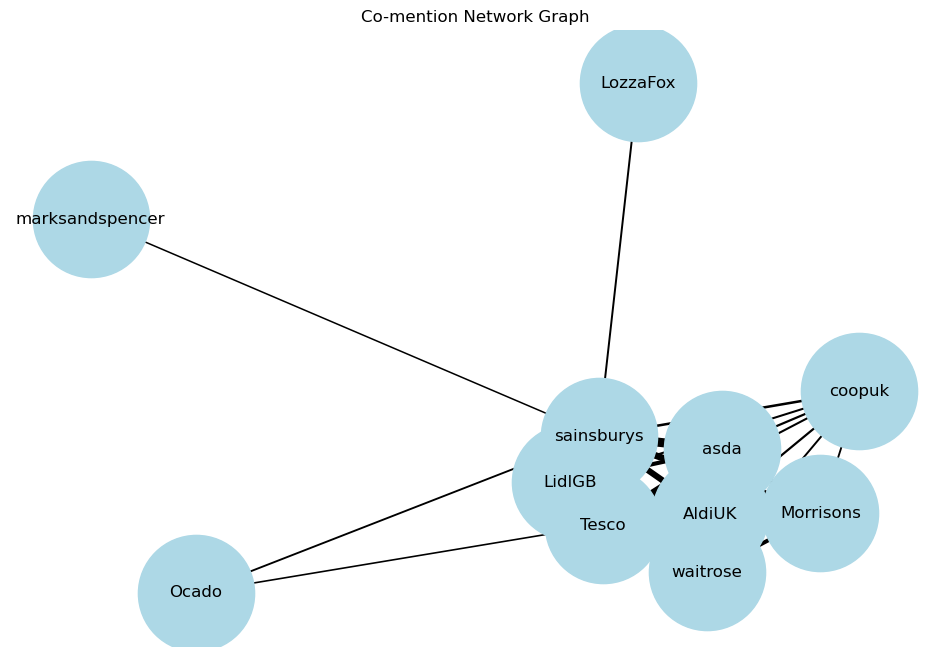

In [68]:
G = nx.Graph()

for index, row in filtered_df.iterrows():
    G.add_edge(row['user1'], row['user2'], weight=row['mention'])

edge_widths = [G[u][v]['weight'] / 1000 for u, v in G.edges()]

plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=7000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=edge_widths)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.title("Co-mention Network Graph")
plt.axis('off')  
plt.show()

# sentiment analysis

In [40]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
# new_stopwords = ["all", "due", "to", "on", "daily"]
# stpwrd.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
sainsburys_df['text'] = sainsburys_df['text'].apply(lambda text: cleaning_stopwords(text))
sainsburys_df['text'].head()

0    RT @felixprojectuk: Today collected food donat...
1    @ocado @tesco @sainsburys @asda @waitrose @Mor...
2    RT @Danwhite1972: Dear panic buyers Please use...
3    @daisy_haggard @sainsburys Can’t wait see @sai...
4    @lordrix @sainsburys But Sainsbury's made 'Big...
Name: text, dtype: object

In [41]:
def to_lower(data):
    return data.lower()
sainsburys_df['text'] = sainsburys_df['text'].apply(lambda x: to_lower(x))
sainsburys_df['text'].head()

0    rt @felixprojectuk: today collected food donat...
1    @ocado @tesco @sainsburys @asda @waitrose @mor...
2    rt @danwhite1972: dear panic buyers please use...
3    @daisy_haggard @sainsburys can’t wait see @sai...
4    @lordrix @sainsburys but sainsbury's made 'big...
Name: text, dtype: object

In [42]:
def remove_email(data):
    return re.sub(r'\S+@\S+', '', data)
sainsburys_df['text'] = sainsburys_df['text'].apply(lambda x: remove_email(x))
sainsburys_df['text'].head()

0    rt @felixprojectuk: today collected food donat...
1    @ocado @tesco @sainsburys @asda @waitrose @mor...
2    rt @danwhite1972: dear panic buyers please use...
3    @daisy_haggard @sainsburys can’t wait see @sai...
4    @lordrix @sainsburys but sainsbury's made 'big...
Name: text, dtype: object

In [43]:
# Remove mentions
def remove_mentions(data):
    return re.sub(r'@\w+\b', '', data)
sainsburys_df['text'] = sainsburys_df['text'].apply(lambda x: remove_mentions(x))
sainsburys_df['text'].head()

0    rt : today collected food donated shoppers bra...
1          it time worked together get list vulnera...
2    rt : dear panic buyers please use humanity lef...
3                       can’t wait see  brings today 🙈
4      but sainsbury's made 'big' thing website hel...
Name: text, dtype: object

In [44]:
# Remove URLs
def remove_URLs(data):
    return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)
sainsburys_df['text'] = sainsburys_df['text'].apply(lambda x: remove_URLs(x))
sainsburys_df['text'].head()

<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
/var/folders/c6/kgt8859s7zlf_90t9xfw7kf00000gn/T/ipykernel_50350/1248489338.py:3: DeprecationWarning: invalid escape sequence '\.'
  return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)


0    rt : today collected food donated shoppers bra...
1          it time worked together get list vulnera...
2    rt : dear panic buyers please use humanity lef...
3                       can’t wait see  brings today 🙈
4      but sainsbury's made 'big' thing website hel…  
Name: text, dtype: object

In [45]:
# Remove punctuations
def remove_punctuations(data):
    return re.sub(r"[~.,%/:;?_&+*=!-]"," ",data)
sainsburys_df['text']= sainsburys_df['text'].apply(lambda x: remove_punctuations(x))
sainsburys_df['text'].head()

0    rt   today collected food donated shoppers bra...
1          it time worked together get list vulnera...
2    rt   dear panic buyers please use humanity lef...
3                       can’t wait see  brings today 🙈
4      but sainsbury's made 'big' thing website hel…  
Name: text, dtype: object

In [46]:
# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
sainsburys_df['text'] = sainsburys_df['text'].apply(lambda x: remove_numbers(x))
sainsburys_df['text'].head()

0    rt   today collected food donated shoppers bra...
1          it time worked together get list vulnera...
2    rt   dear panic buyers please use humanity lef...
3                       can’t wait see  brings today 🙈
4      but sainsbury's made 'big' thing website hel…  
Name: text, dtype: object

In [47]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
sainsburys_df['text']= sainsburys_df['text'].apply(lambda x: stemming_on_text(x))
sainsburys_df['text'].head()

0    rt   today collected food donated shoppers bra...
1          it time worked together get list vulnera...
2    rt   dear panic buyers please use humanity lef...
3                       can’t wait see  brings today 🙈
4      but sainsbury's made 'big' thing website hel…  
Name: text, dtype: object

In [48]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
sainsburys_df['text'] = sainsburys_df['text'].apply(lambda x: lemmatizer_on_text(x))
sainsburys_df['text'].head()

0    rt   today collected food donated shoppers bra...
1          it time worked together get list vulnera...
2    rt   dear panic buyers please use humanity lef...
3                       can’t wait see  brings today 🙈
4      but sainsbury's made 'big' thing website hel…  
Name: text, dtype: object

In [49]:
def remove_emoji(text):
    cleaned_text = emoji.demojize(text)
    cleaned_text = re.sub(r':[a-zA-Z_]+:', '', cleaned_text)
    return cleaned_text
sainsburys_df['text'] = sainsburys_df['text'].apply(lambda x: remove_emoji(x))
sainsburys_df['text'].head()

0    rt   today collected food donated shoppers bra...
1          it time worked together get list vulnera...
2    rt   dear panic buyers please use humanity lef...
3      can’t wait see  brings today :see-no-evil_mo...
4      but sainsbury's made 'big' thing website hel…  
Name: text, dtype: object

In [50]:
def remove_rt(text):
    cleaned_text = re.sub(r'\brt\b', '', text)
    return cleaned_text.strip()
sainsburys_df['text'] = sainsburys_df['text'].apply(lambda x: remove_rt(x))
sainsburys_df['text'].head()

0    today collected food donated shoppers branch  ...
1         it time worked together get list vulnerable…
2    dear panic buyers please use humanity left  am...
3    can’t wait see  brings today :see-no-evil_monkey:
4        but sainsbury's made 'big' thing website hel…
Name: text, dtype: object

In [51]:
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [76]:
def analyze_sentiment_score(text):
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    return compound_score

In [52]:
sainsburys_df['sentiment'] = sainsburys_df['text'].apply(analyze_sentiment)

In [77]:
sainsburys_df['sentiment_score'] = sainsburys_df['text'].apply(analyze_sentiment_score)

In [78]:
sainsburys_df

created_at                   id               id_str  \
0     2020-12-02 21:25:42  1334247396054798336  1334247396054798336   
1     2020-03-25 08:55:11  1242736777103839237  1242736777103839237   
2     2020-03-15 18:07:30  1239251894293409797  1239251894293409797   
3     2020-10-18 10:43:27  1317778311729369088  1317778311729369088   
4     2020-11-07 20:52:20  1325179302384717824  1325179302384717824   
...                   ...                  ...                  ...   
82816 2020-03-24 09:20:16  1242380703783890944  1242380703783890944   
82817 2020-12-22 10:01:18  1341322914709319680  1341322914709319680   
82818 2020-10-03 09:40:22  1312326620368302080  1312326620368302080   
82819 2020-10-03 11:46:20  1312358321232449536  1312358321232449536   
82820 2020-04-17 14:51:25  1251161347670196228  1251161347670196228   

                                                    text display_text_range  \
0      today collected food donated shoppers branch  ...               None   
1           it time worked together get list vulnerable…               None   
2      dear panic buyers please use humanity left  am...               None   
3      can’t wait see  brings today :see-no-evil_monkey:           [27, 79]   
4          but sainsbury's made 'big' thing website hel…          [21, 140]   
...                                                  ...                ...   
82816  i'm  say i'm elderly  can't contact get list p...           [0, 112]   
82817  if borders opened again    obviously christmas...          [21, 117]   
82818               why would anyone black  want  use it           [46, 96]   
82819                                                              [0, 116]   
82820                   help stop spread shopping stores               None   

                                                  source  truncated  \
0      <a href="http://twitter.com/download/iphone" r...      False   
1      <a href="http://twitter.com/download/iphone" r...       True   
2      <a href="http://twitter.com/#!/download/ipad" ...      False   
3      <a href="http://twitter.com/download/iphone" r...      False   
4      <a href="http://twitter.com/download/android" ...       True   
...                                                  ...        ...   
82816  <a href="https://mobile.twitter.com" rel="nofo...      False   
82817  <a href="http://twitter.com/download/iphone" r...      False   
82818  <a href="https://mobile.twitter.com" rel="nofo...      False   
82819  <a href="https://mobile.twitter.com" rel="nofo...      False   
82820  <a href="http://twitter.com/#!/download/ipad" ...      False   

       in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                        NaN                        NaN                  NaN   
1                        NaN                        NaN         2.015550e+07   
2                        NaN                        NaN                  NaN   
3               1.317512e+18               1.317512e+18         2.875019e+09   
4               1.325169e+18               1.325169e+18         5.496380e+07   
...                      ...                        ...                  ...   
82816                    NaN                        NaN         8.068565e+07   
82817           1.341323e+18               1.341323e+18         1.049639e+18   
82818           1.312323e+18               1.312323e+18         3.098093e+07   
82819                    NaN                        NaN         7.587032e+06   
82820                    NaN                        NaN                  NaN   

       ...                                  extended_entities scopes  \
0      ...                                               None    NaN   
1      ...                                               None    NaN   
2      ...                                               None    NaN   
3      ...                                               None    NaN   
4      ...                             

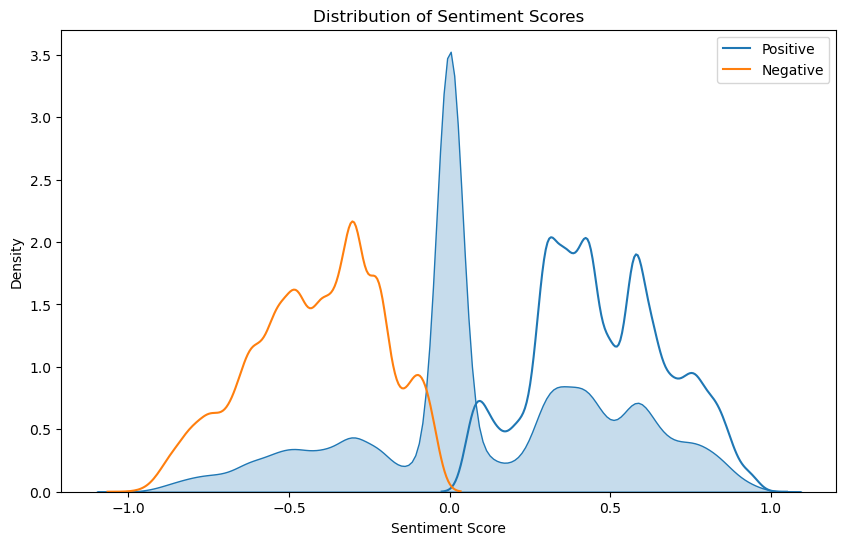

In [82]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(sainsburys_df['sentiment_score'], ax=ax, fill=True)
ax.set_title('Distribution of Sentiment Scores')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Density')

sns.kdeplot(sainsburys_df[sainsburys_df['sentiment'] == 'positive']['sentiment_score'], ax=ax, label='Positive')
sns.kdeplot(sainsburys_df[sainsburys_df['sentiment'] == 'negative']['sentiment_score'], ax=ax, label='Negative')
ax.legend()

plt.show()

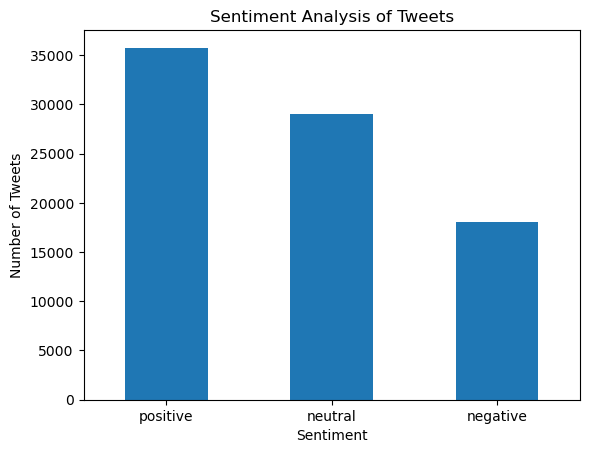

In [73]:
sentiment_counts = sainsburys_df['sentiment'].value_counts()

plt.figure()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

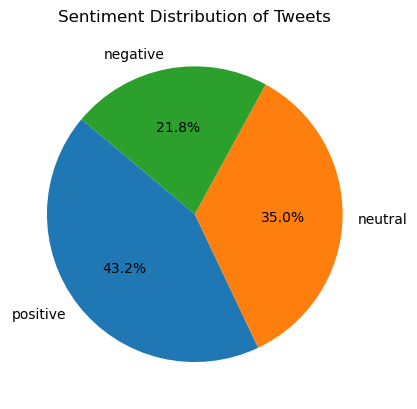

In [74]:
plt.figure()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Tweets')
plt.show()

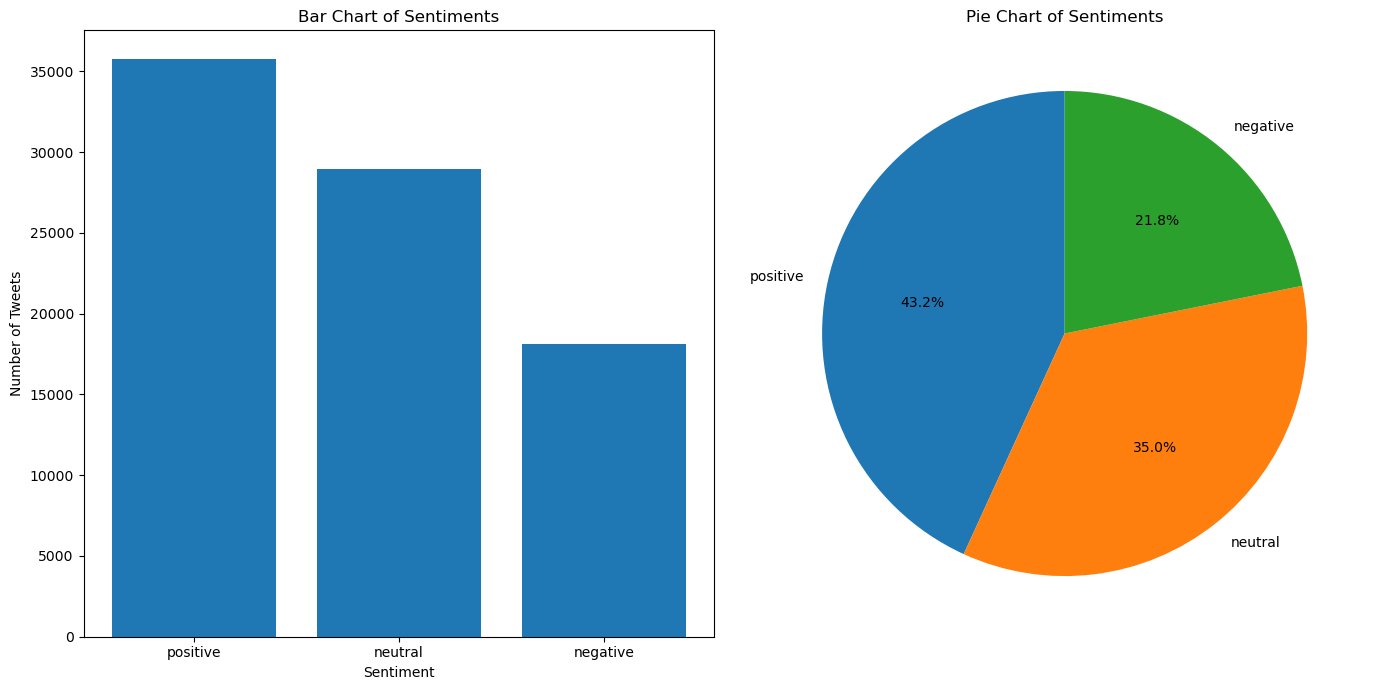

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].bar(sentiment_counts.index, sentiment_counts.values)
ax[0].set_title('Bar Chart of Sentiments')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylabel('Number of Tweets')

ax[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Pie Chart of Sentiments')

plt.tight_layout()
plt.show()

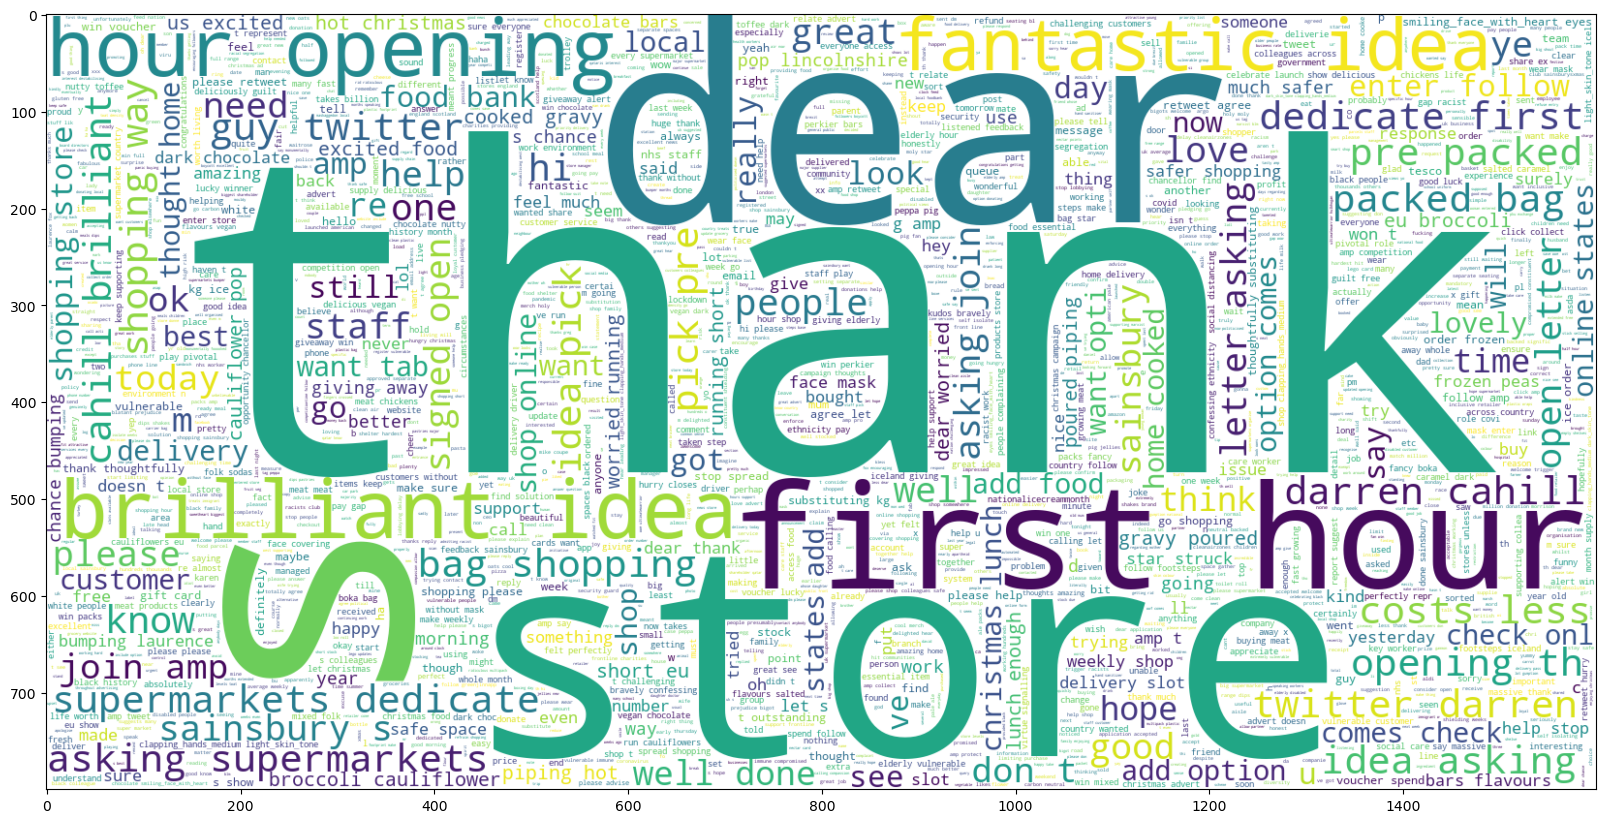

In [54]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(sainsburys_df[sainsburys_df.sentiment == 'positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

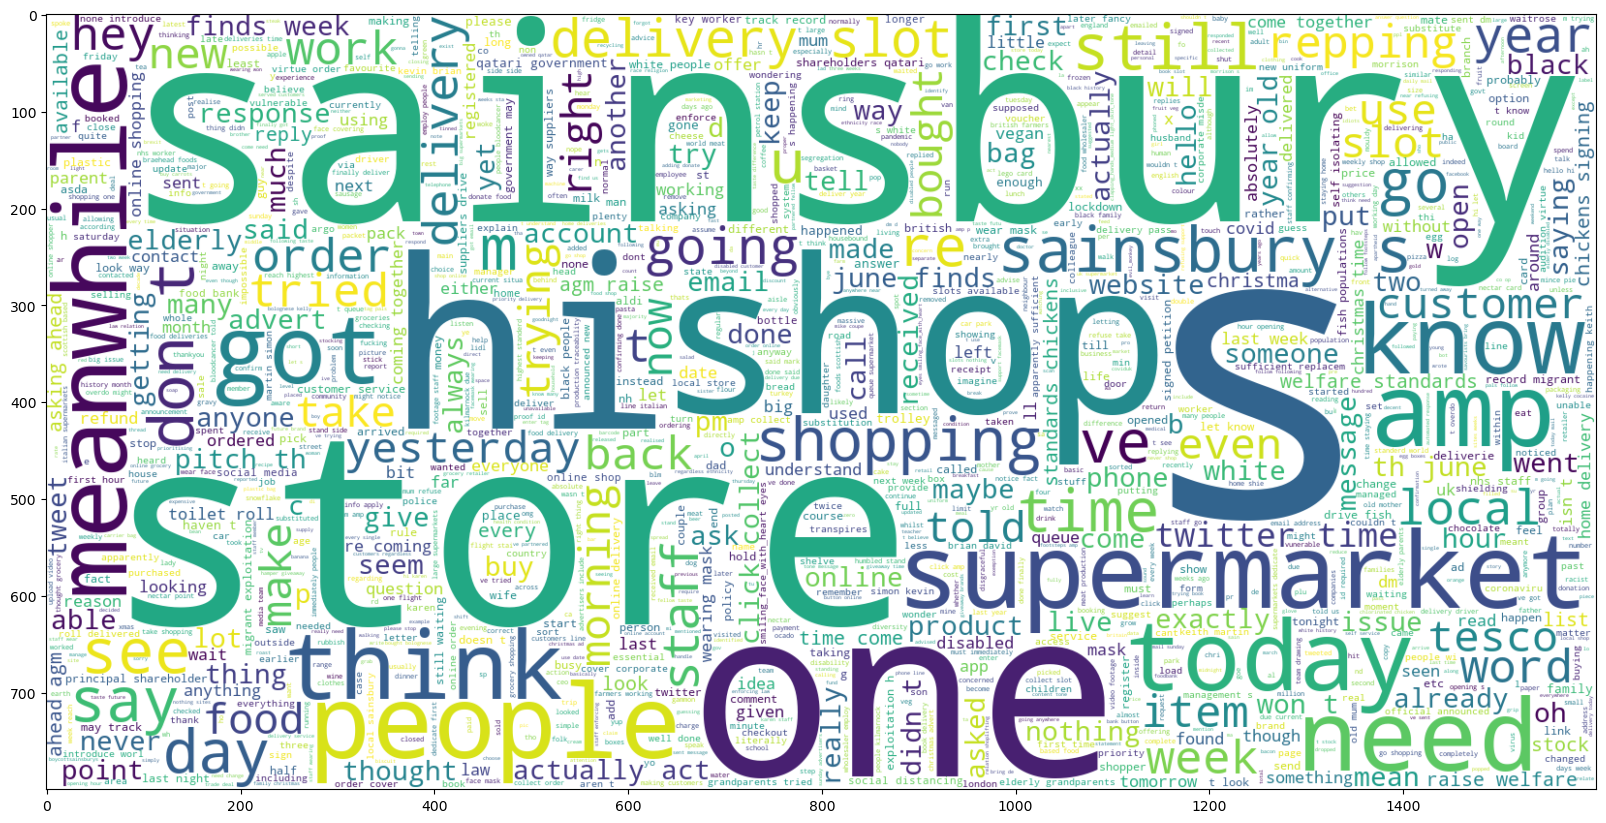

In [55]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(sainsburys_df[sainsburys_df.sentiment == 'neutral'].text))
plt.imshow(wc , interpolation = 'bilinear')

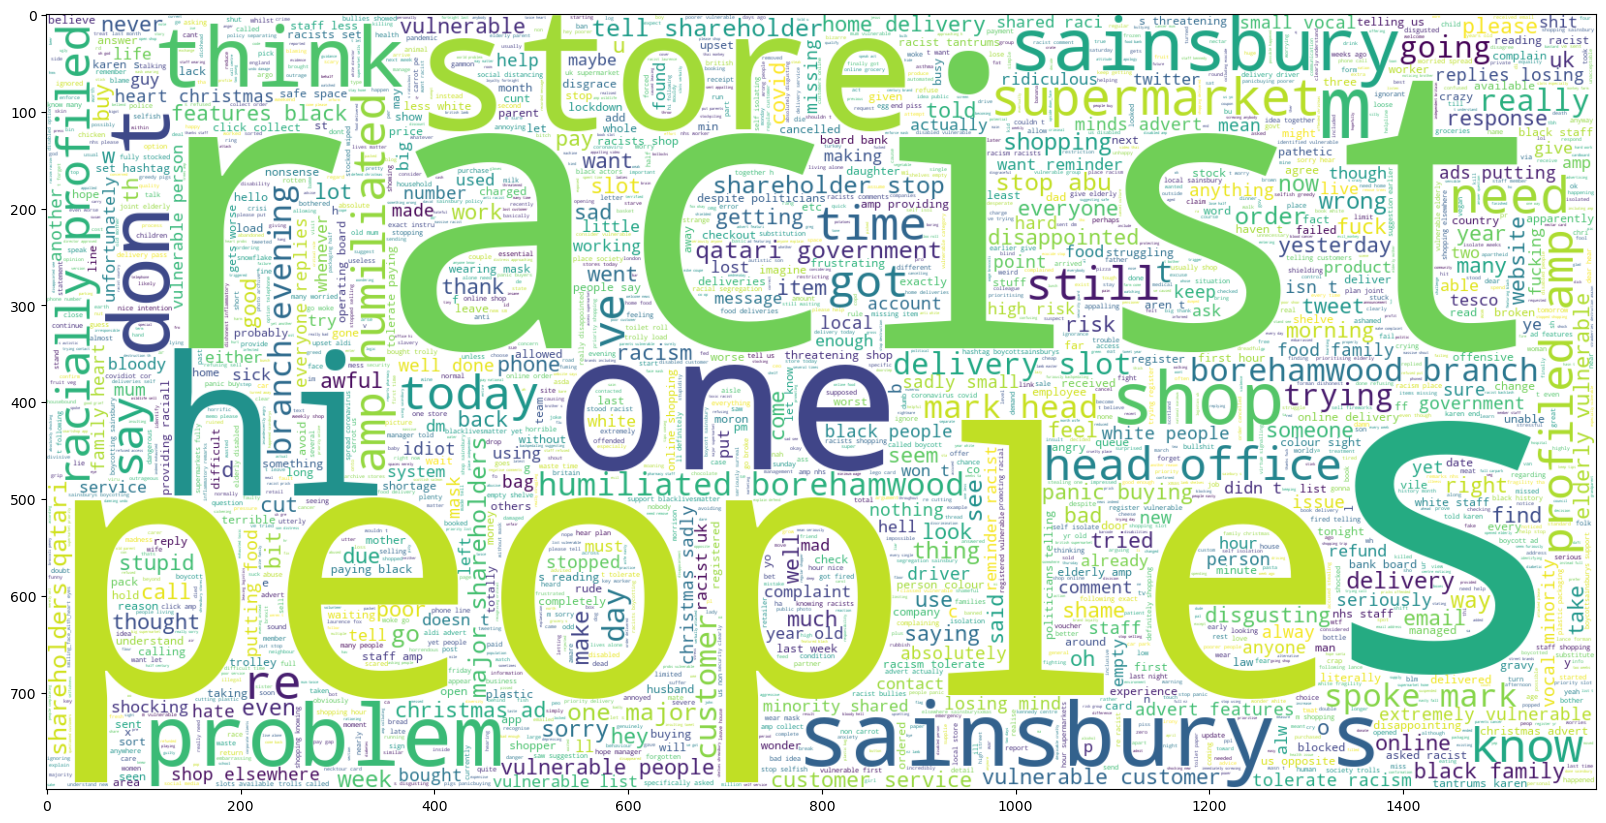

In [56]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(sainsburys_df[sainsburys_df.sentiment == 'negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

# LDA

In [57]:
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
    # using the if condition because we introduced extra spaces during text cleaning
         # if word != '' and word not in stop_words:
        if word!='':
           words.append(word)
    return words

In [58]:
sainsburys_df['tokens']=sainsburys_df.text.apply(generate_tokens)

In [59]:
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(sainsburys_df['tokens'])
print(id2word)

Dictionary<36151 unique tokens: ['alperton', 'branch', 'collected', 'donated', 'find…']...>


In [60]:
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(sainsburys_df['tokens'],id2word)
print(sainsburys_df['tokens'][0])
print(corpus[0])

['today', 'collected', 'food', 'donated', 'shoppers', 'branch', 'alperton', 'touched', 'find…']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [61]:
from gensim import models

In [62]:
lda_model = models.LdaModel(corpus, num_topics=5, id2word=id2word, passes=15)

topics = lda_model.print_topics()
for topic in topics:
    print(topic)

(0, '0.036*"…" + 0.025*"supermarkets" + 0.016*"first" + 0.015*"hour" + 0.014*"a" + 0.013*"th…" + 0.012*"twitter" + 0.012*"idea" + 0.011*"opening" + 0.010*"brilliant"')
(1, '0.026*"i" + 0.022*"shopping" + 0.014*"way" + 0.012*"want" + 0.012*"done" + 0.011*"dear" + 0.011*"less" + 0.010*"bag" + 0.010*"pick" + 0.010*"stop"')
(2, '0.057*"i" + 0.014*"delivery" + 0.013*"get" + 0.012*"please" + 0.012*"hi" + 0.011*"amp" + 0.010*"vulnerable" + 0.007*"online" + 0.007*"order" + 0.006*"help"')
(3, '0.025*"i" + 0.016*"people" + 0.015*"amp" + 0.015*"…" + 0.011*"black" + 0.010*"open" + 0.009*"white" + 0.008*"asking" + 0.008*"what" + 0.008*"racist"')
(4, '0.019*"i" + 0.010*"you" + 0.009*"good" + 0.009*"it" + 0.008*"staff" + 0.008*"get" + 0.007*"thank" + 0.007*"people" + 0.007*"us" + 0.007*"the"')


In [63]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, random_state=100, )
topics = lda_model.print_topics()
for topic in topics:
    print(topic)

(0, '0.016*"racist" + 0.015*"like" + 0.015*"thanks" + 0.014*"shop" + 0.013*"the" + 0.013*"£" + 0.011*"i\'m" + 0.010*"sainsbury\'s" + 0.010*"call" + 0.009*"work"')
(1, '0.026*"black" + 0.024*"people" + 0.019*"could" + 0.019*"white" + 0.015*"ok" + 0.014*"we" + 0.014*"family" + 0.014*"advert" + 0.013*"check" + 0.013*"staff"')
(2, '0.016*"it" + 0.012*"and" + 0.010*"the" + 0.010*"it’s" + 0.009*"store" + 0.009*"…" + 0.009*"one" + 0.008*"not" + 0.008*"yes" + 0.008*"local"')
(3, '0.091*"i" + 0.018*"get" + 0.017*"delivery" + 0.012*"online" + 0.011*"vulnerable" + 0.010*"want" + 0.010*"shop" + 0.009*"hi" + 0.008*"please" + 0.007*"know"')
(4, '0.080*"…" + 0.026*"to" + 0.024*"christmas" + 0.019*"food" + 0.018*")" + 0.016*"us" + 0.016*"home" + 0.015*"get" + 0.013*"just" + 0.013*"time"')
(5, '0.032*"i" + 0.027*"well" + 0.026*"please" + 0.020*"shopping" + 0.019*"done" + 0.017*"stop" + 0.013*"dear" + 0.013*"stores" + 0.012*"tell" + 0.011*"wear"')
(6, '0.035*"way" + 0.030*"shopping" + 0.024*"i" + 0.024*